In [1]:
import numpy as np
from sympy import integrate, exp, symbols, frac, Rational, erf
from sympy.plotting import plot
import matplotlib.pyplot as plt
import lmfit

from sympy import init_printing

init_printing()

The paper writes

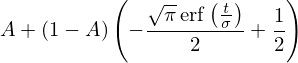

In [2]:
A, t, sigma, x = symbols('A t \sigma, x')

func = A + (1 - A)*( Rational(1, 2) - integrate(exp(-x**2), (x, 0, t/sigma)) ) 
func

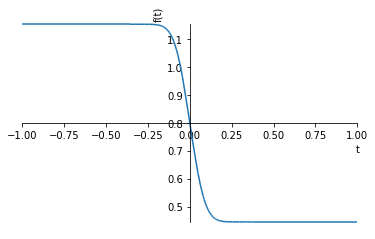

In [3]:
A_val = 0.6
func_subs = func.subs([(A, A_val), (sigma, 0.1)])

plot(func_subs, (t, -1, 1))

In [4]:
negative_limit = func_subs.evalf(subs=dict(t=-1e9))
positive_limit = func_subs.evalf(subs=dict(t=1e9))

print(f"The function for A={A_val} goes from {negative_limit:.3f} to {positive_limit:.3f}")

The function for A=0.6 goes from 1.154 to 0.446


In [5]:
t_vals = np.linspace(-1, 1, 1000)

y = np.array([float(func_subs.subs(dict(t=t_val))) for t_val in t_vals])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 999
    # variables        = 3
    chi-square         = 7.4784e-17
    reduced chi-square = 7.5085e-20
    Akaike info crit   = -43988.6402
    Bayesian info crit = -43973.9199
[[Variables]]
    sigma:      0.07071304 +/- 8.6584e-13 (0.00%) (init = 1)
    center:    -0.00100100 +/- 8.6584e-13 (0.00%) (init = 0)
    amplitude:  0.70898154 +/- 7.5181e-12 (0.00%) (init = 1)
    fwhm:       0.16651648 +/- 2.0389e-12 (0.00%) == '2.3548200*sigma'
    height:     3.99986660 +/- 4.2415e-11 (0.00%) == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude) =  0.577



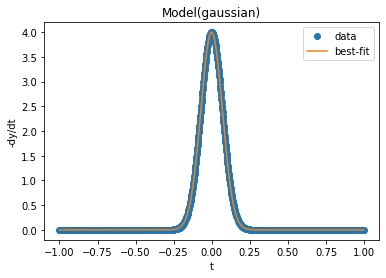

In [6]:
dt = t_vals[1] - t_vals[0]
dy_dt = np.diff(y)/dt

model = lmfit.models.GaussianModel()

result = model.fit(-dy_dt, x=t_vals[:-1])

fig, ax = plt.subplots()
result.plot_fit(ax=ax)
ax.set_xlabel('t')
ax.set_ylabel('-dy/dt')
print(result.fit_report())

when $\sigma=1$ in the equaiton the fit gives $\sigma=1/\sqrt(2)$